#**Loading Modules**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Reading Data**

In [94]:
train = pd.read_csv('Train.csv')
train.head(10)

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15        9.300  ...  Supermarket Type1          3735.1380
1           DRC01        5.920  ...  Supermarket Type2           443.4228
2           FDN15       17.500  ...  Supermarket Type1          2097.2700
3           FDX07       19.200  ...      Grocery Store           732.3800
4           NCD19        8.930  ...  Supermarket Type1           994.7052
5           FDP36       10.395  ...  Supermarket Type2           556.6088
6           FDO10       13.650  ...  Supermarket Type1           343.5528
7           FDP10          NaN  ...  Supermarket Type3          4022.7636
8           FDH17       16.200  ...  Supermarket Type1          1076.5986
9           FDU28       19.200  ...  Supermarket Type1          4710.5350

[10 rows x 12 columns]

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [96]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [97]:
from pandas_profiling import ProfileReport                            # It is basic but i find it quit useful so i used it
profile = ProfileReport(train, title="Pandas Profiling Report")

In [98]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

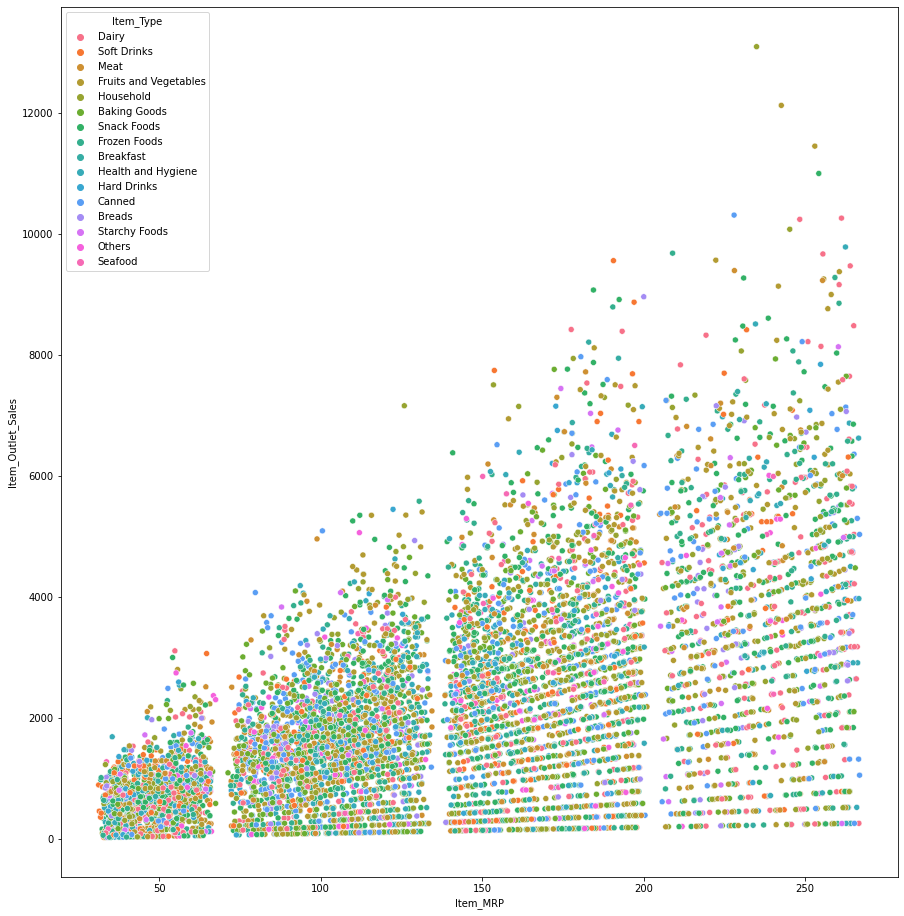

In [99]:
plt.figure(figsize=(15,16))
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=train,hue="Item_Type")

#**Questions**
- Best Item/Product
- Best Location
- Best Outlet Size
- Best Location
- Best Outlet Type

#**Cleaning Data , Removing Duplicates , Finding Outliers & Handling Null Values( Data Preprocessing )**

In [100]:
train.apply(lambda x: len(x.unique()))          # gives no. of unique values each variable/column has

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [101]:
# In Item_Fat_Content , we found only two relevant variablles - Low Fat & Regular
train["Item_Fat_Content"] = train['Item_Fat_Content'].map({
    "low fat":"Low Fat",
    "Low Fat":"Low Fat",
    "LF":"Low Fat",
    "reg":"Regular",
    "Regular":"Regular"
})

In [102]:
train.isnull().sum()                # counts null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [103]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)            # it contains outliers

In [104]:
train.isnull().sum()    # null values replaced with appropriates

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [105]:
''' Delting not necessary columns/variables ,  we found out Item_Identifier has no use and Outlet_Identifier has only 2 outlets differentiating
which will not give that much insight so we also delete it '''

train.drop('Item_Identifier',axis=1,inplace=True)
train.drop('Outlet_Identifier',axis=1,inplace=True)

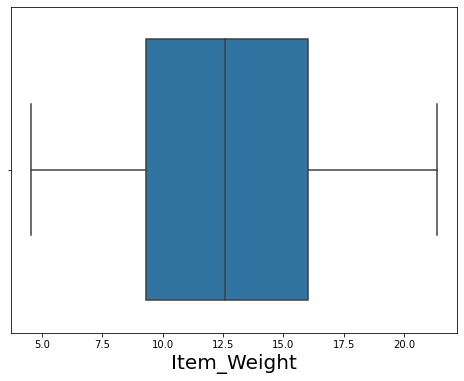

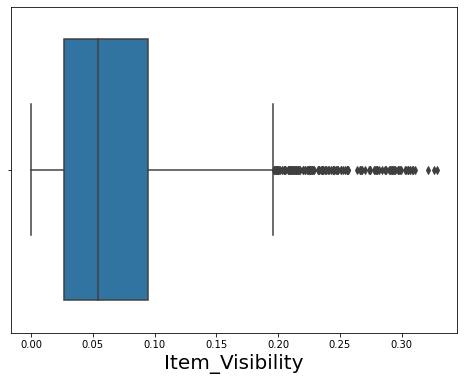

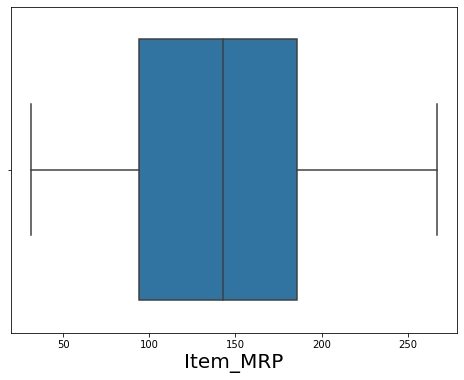

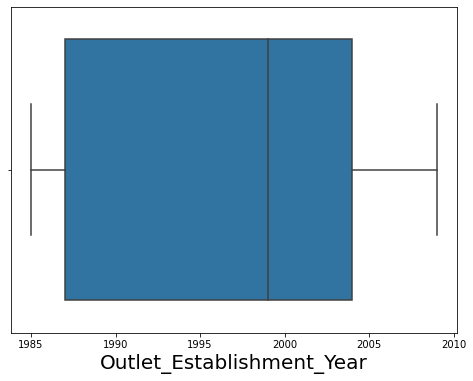

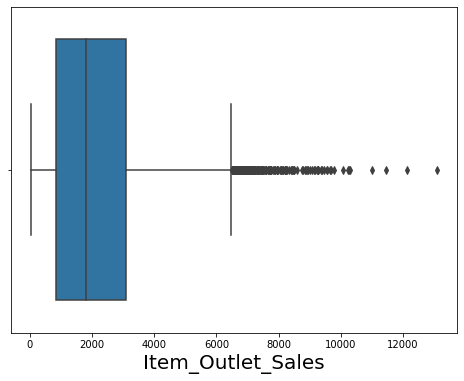

In [106]:
columns = train.select_dtypes(exclude="object")
col = columns.columns
for i in col:
  plt.figure(figsize=(8,6))
  sns.boxplot(data=train,x=i)
  plt.xlabel(i,fontsize=20)

In [107]:
# converting years into numbers so they can also help
train['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda year: 2009 - year)

In [108]:
train.drop('Outlet_Establishment_Year',axis=1,inplace=True)                # We get Age , so we don't need Outlet_Establishment_Year

In [109]:
train.columns            # Proof

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [110]:
# Here we will find outliers and do you remember Quantiles , we use them to find and remove them , here we found outliers in Item_Outlet_Sales & in Item_Visibility
def rem_out(dataframe,column):
    Q3=dataframe[column].quantile(0.75)
    Q1=dataframe[column].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 + (1.5 * IQR)
    no_outliers = dataframe[(dataframe[column]>lower) & (dataframe[column]<upper)]
    return no_outliers

train = rem_out(train,"Item_Outlet_Sales")
train = rem_out(train,"Item_Visibility")

In [111]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [112]:
col_names = train.columns.values

columns = 10
for i in range (0,columns):
  print(col_names[i], " -> ",train[col_names[i]].unique())

Item_Weight  ->  [15.1   16.85  13.6   12.6    7.475  9.695 11.6   17.7    9.895 13.5
 19.7   11.8   12.65  10.895 12.15   8.31   8.27  20.75  19.     8.155
 17.     7.47   6.3   20.7   10.1    6.465  8.895  8.39  18.85  19.35
 20.85  17.75  16.     8.1    7.39   9.195 12.85   6.89  13.35  15.
 13.8   15.75   7.59  13.15   5.365  7.6   16.7  ]
Item_Fat_Content  ->  ['Low Fat' 'Regular']
Item_Visibility  ->  [0.1734813  0.16076005 0.11941812 0.11679292 0.14882181 0.12848269
 0.1440174  0.11691591 0.1164455  0.16779933 0.11753756 0.15462725
 0.12552873 0.12224285 0.16102755 0.13086741 0.11581901 0.11787402
 0.1285434  0.11809967 0.15692661 0.13669689 0.13144585 0.1161486
 0.12792793 0.12887654 0.12933759 0.15771893 0.1277927  0.12683185
 0.13144392 0.12953481 0.1161088  0.16065368 0.11969289 0.12880581
 0.14009028 0.16878039 0.15277077 0.14501343 0.13205857 0.12744903
 0.16966714 0.1671552  0.12440251 0.12461089 0.14433849 0.12039699
 0.1424434  0.11808044 0.13444176 0.13670168 0.1373680

#**Label Encoding**

In [113]:
# For better results , we will encode Outlet_Location_Type , Outlet_Size , Outlet_Type , Item_Type , Item_Fat_Content
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])

In [114]:
# Checking 
col_names = train.columns.values

columns = 10
for i in range (0,columns):
  print(col_names[i], " -> ",train[col_names[i]].unique())

Item_Weight  ->  [15.1   16.85  13.6   12.6    7.475  9.695 11.6   17.7    9.895 13.5
 19.7   11.8   12.65  10.895 12.15   8.31   8.27  20.75  19.     8.155
 17.     7.47   6.3   20.7   10.1    6.465  8.895  8.39  18.85  19.35
 20.85  17.75  16.     8.1    7.39   9.195 12.85   6.89  13.35  15.
 13.8   15.75   7.59  13.15   5.365  7.6   16.7  ]
Item_Fat_Content  ->  [0 1]
Item_Visibility  ->  [0.1734813  0.16076005 0.11941812 0.11679292 0.14882181 0.12848269
 0.1440174  0.11691591 0.1164455  0.16779933 0.11753756 0.15462725
 0.12552873 0.12224285 0.16102755 0.13086741 0.11581901 0.11787402
 0.1285434  0.11809967 0.15692661 0.13669689 0.13144585 0.1161486
 0.12792793 0.12887654 0.12933759 0.15771893 0.1277927  0.12683185
 0.13144392 0.12953481 0.1161088  0.16065368 0.11969289 0.12880581
 0.14009028 0.16878039 0.15277077 0.14501343 0.13205857 0.12744903
 0.16966714 0.1671552  0.12440251 0.12461089 0.14433849 0.12039699
 0.1424434  0.11808044 0.13444176 0.13670168 0.13736805 0.15908174
 0.

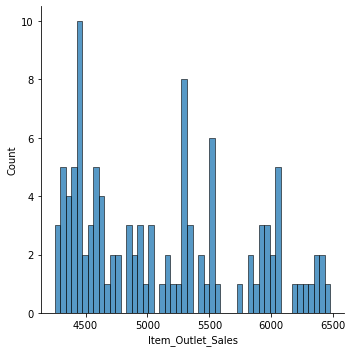

In [115]:
sns.displot(train['Item_Outlet_Sales'].dropna(),kde=False,bins=50)

#**Correlation**
Using Correlation Matrix

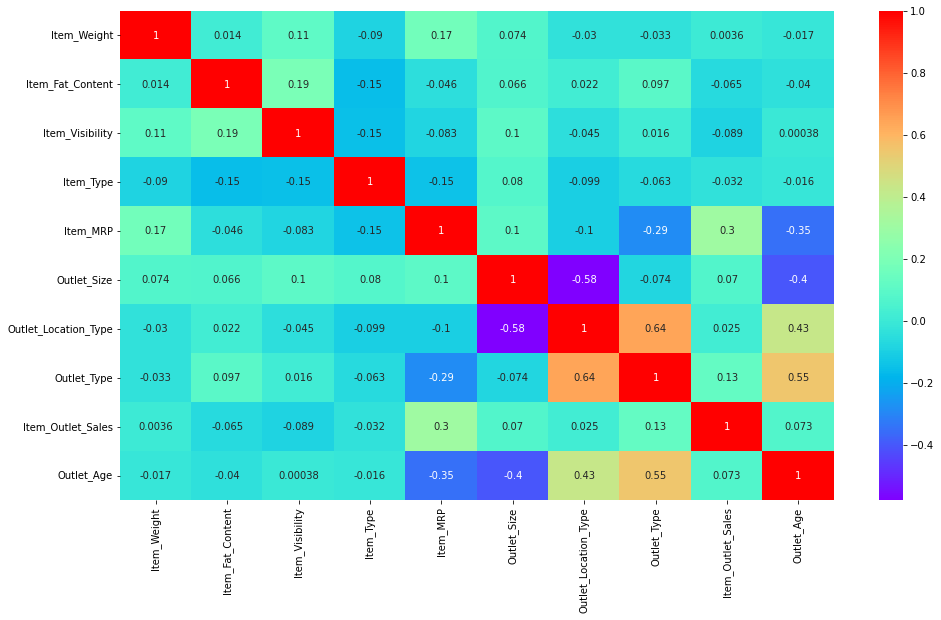

In [116]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(),annot=True,cmap="rainbow")

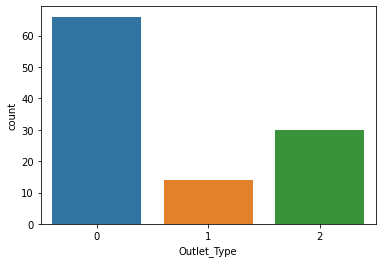

In [117]:
sns.countplot(x="Outlet_Type",data=train)

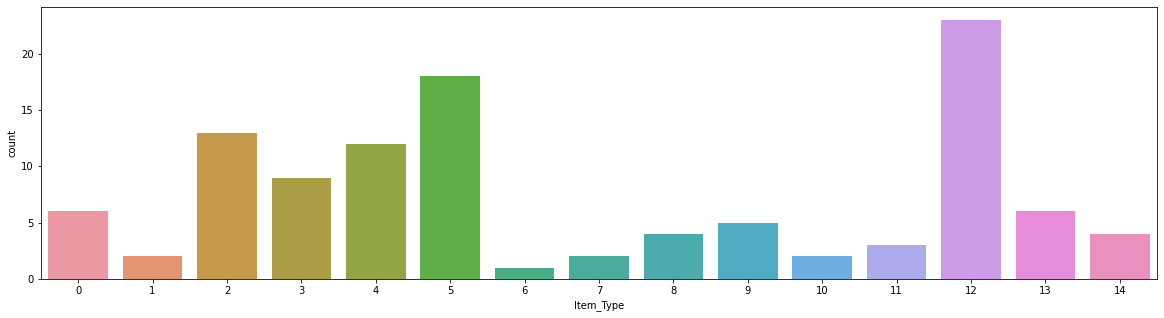

In [118]:
plt.figure(figsize=(20,5))                         # for Items
plot = sns.countplot(x="Item_Type",data=train)

#**Split**

In [124]:
X = train.drop(columns=['Item_Outlet_Sales'])
Y = train["Item_Outlet_Sales"]

#**Train Model**

In [125]:
# Spliting Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [126]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [127]:
def mlmodel(X_train,Y_train):

  from sklearn.linear_model import LinearRegression
  linReg = LinearRegression(normalize=True)
  linReg.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestRegressor
  ranFor = RandomForestRegressor()
  ranFor.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeRegressor
  dTreeReg = DecisionTreeRegressor()
  dTreeReg.fit(X_train , Y_train)

  #printing accuracy
  print('linReg Accuracy : ',linReg.score(X_train,Y_train))
  print('ranFor Accuracy : ',ranFor.score(X_train,Y_train))
  print('dTreeReg Accuracy : ',dTreeReg.score(X_train,Y_train))

  return linReg , ranFor , dTreeReg

In [129]:
model = mlmodel(X_train , Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


linReg Accuracy :  0.20699914076762405
ranFor Accuracy :  0.8432145610726869
dTreeReg Accuracy :  1.0


In [133]:
# Testing | Predicting on Test Data
#Cross Validation Pending

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# continue from here